# Initial Database Exploraton

## Import relevant libraries and load data

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme(style="dark", color_codes=True)
sns.set_palette("mako")
plt.rcParams["figure.figsize"] = (25,5)

In [7]:
# Read in data in  sheet "RA Farm list December 2021" of the file

producers_data = pd.read_excel(""../data/external/Certified-Farms-CoC-Operations-January-2022.xlsx", sheet_name="RA Farm list December 2021", header=2, usecols="A:S")

In [8]:
# Show first 5 rows

producers_data.head()

,Farm name,Crop,Category,Type,Total Hectares,Production Hectares,Volume,Unit,Total Workers,Female workers,Male Workers,Producers,Country,Continent,Certification Body,Date First Issued,Last issued,Expiration Date,Certificate Code
0,Glatfelter CASI (Catanduanes Abaca Sustainabil...,Abaca,Ornamental & medicinal plants,Group,855.71,598.22,671513.0,kg,48,4,44,228,Philippines,Asia,Preferred by Nature - Nepcon OÜ,2013-02-08,2018-09-12,2022-03-11,NC-G-06319
1,Organic Supply S.A.,Abaca,Ornamental & medicinal plants,Group,2016.89,8.20,16501.0,kg,143,35,108,33,Ecuador,South America,CERES,2021-04-27,2021-04-27,2024-04-26,CERES-G-103153
2,GRUPO JADE DEL CARIBE S.A.,Abaca,Ornamental & medicinal plants,Group,740.56,14.42,129780.0,kg,556,61,495,3,Costa Rica,Central America,Preferred by Nature - Nepcon OÜ,2008-01-01,2021-05-08,2024-05-07,NC-G-00895
3,Glatfelter Costa Rica S.R.L,Abaca,Ornamental & medicinal plants,Group,55.99,24.75,48700.0,kg,10,2,8,7,Costa Rica,Central America,CERES,2021-07-22,2021-07-22,2024-07-21,CERES-G-103366
4,Top Açaí Industria e Comercio de Polpas de Fru...,Açaí,Fruit,Group,309.60,245.84,161524.0,kg,2,0,2,4,Brazil,South America,IBD,2019-01-24,2019-01-24,2022-01-23,IBD-G-101885


### Select Amazon Rainforest Countries

In [9]:
# Access only farms in: Brazil, Bolivia, Peru, Ecuador, Colombia, Venezuela, Guyana, Suriname

amazon_data = producers_data.loc[producers_data["Country"].isin(["Brazil", "Bolivia", "Peru", "Ecuador", "Colombia", "Venezuela", "Guyana", "Suriname"])]
amazon_data.head()


,Farm name,Crop,Category,Type,Total Hectares,Production Hectares,Volume,Unit,Total Workers,Female workers,Male Workers,Producers,Country,Continent,Certification Body,Date First Issued,Last issued,Expiration Date,Certificate Code
1,Organic Supply S.A.,Abaca,Ornamental & medicinal plants,Group,2016.89,8.20,16501.0,kg,143,35,108,33,Ecuador,South America,CERES,2021-04-27,2021-04-27,2024-04-26,CERES-G-103153
4,Top Açaí Industria e Comercio de Polpas de Fru...,Açaí,Fruit,Group,309.60,245.84,161524.0,kg,2,0,2,4,Brazil,South America,IBD,2019-01-24,2019-01-24,2022-01-23,IBD-G-101885
21,SOCIEDAD AGRÍCOLA DROKASA S.A.,Asparagus,Vegetable,Farm,4351.63,431.87,5482000.0,kg,5793,2338,3455,1,Peru,South America,Preferred by Nature - Nepcon OÜ,2020-01-28,2020-01-28,2023-01-27,NC-F-102483
22,Espárragos del Perú S.A.C.,Asparagus,Vegetable,Farm,170.00,105.00,926098.5,kg,97,41,56,1,Peru,South America,Preferred by Nature - Nepcon OÜ,2018-10-25,2018-10-25,2022-02-24,NC-F-101716
23,Agricola San Gallán S.A.C. - Fundo Teresita,Asparagus,Vegetable,Farm,239.20,120.00,1080000.0,kg,337,189,148,1,Peru,South America,Preferred by Nature - Nepcon OÜ,2014-04-07,2021-05-03,2024-05-02,NC-F-008220


## Data Analysis

### Functions

In [181]:
def NumberOfFarmsBarPlot(var_name, var_labels):
    n_per_var = []
    var_dataset = []

    for var in var_labels:
        var_data = amazon_data.loc[amazon_data[var_name] == var]
        var_dataset.append(var_data)
        n_per_var.append(len(var_data))

    print(n_per_var)

    plt.bar(var_labels, n_per_var)
    plt.show()
    
    return var_dataset

def CountBarPlot(labels, var_data, var_name):
    n_per_var = []

    for var in var_data:
        n_per_var.append(var[var_name].sum())

    print(n_per_var)

    plt.bar(labels, n_per_var)
    plt.rcParams["figure.figsize"] = (25,5)
    plt.ylabel(var_name)
    plt.show()
    
    return

def GenderWorkersBarPlot(var_data, labels):
    w_per_var = []
    fw_per_var = []
    mw_per_var = []

    for var in var_data:
        w_per_var.append(var["Total Workers"].sum())
        fw_per_var.append(var["Female workers"].sum())
        mw_per_var.append(var["Male Workers"].sum())

    print("Tot workers:", w_per_var)
    print("Female workers:", fw_per_var)
    print("Male workers:", mw_per_var)

    fig, ax = plt.subplots()
    ax.bar(labels, fw_per_var, label = "Female Workers", align='center')
    ax.bar(labels, mw_per_var, label = "Male Workers", bottom=fw_per_var, align='center')
    ax.set_ylabel("Total Workers")
    ax.legend()
    plt.show()
    
    return

### Workers Analysis

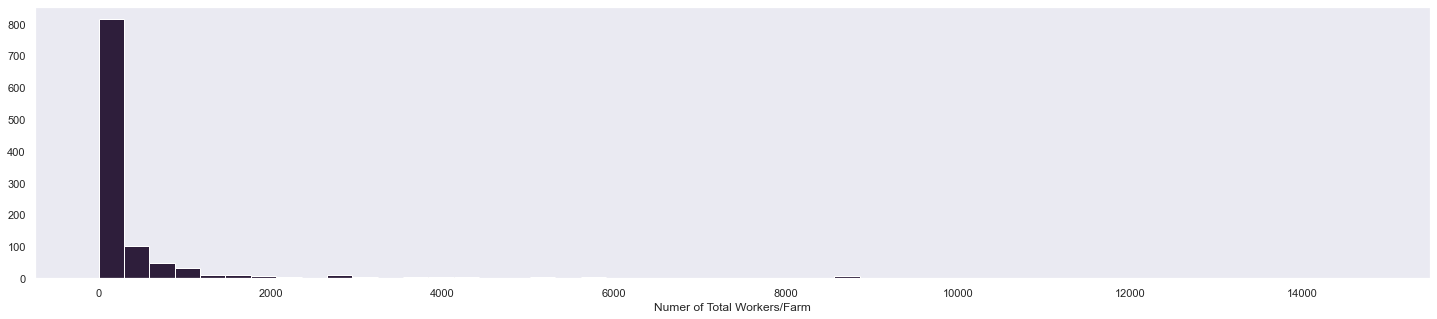

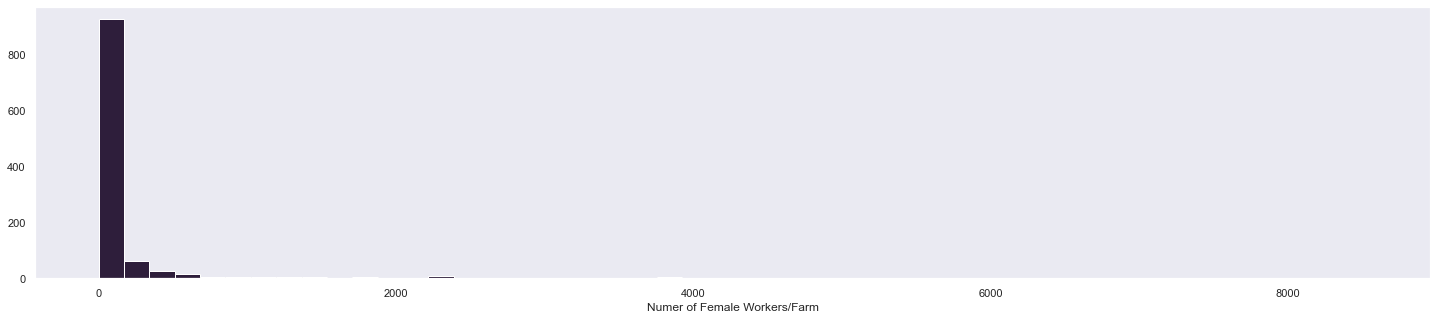

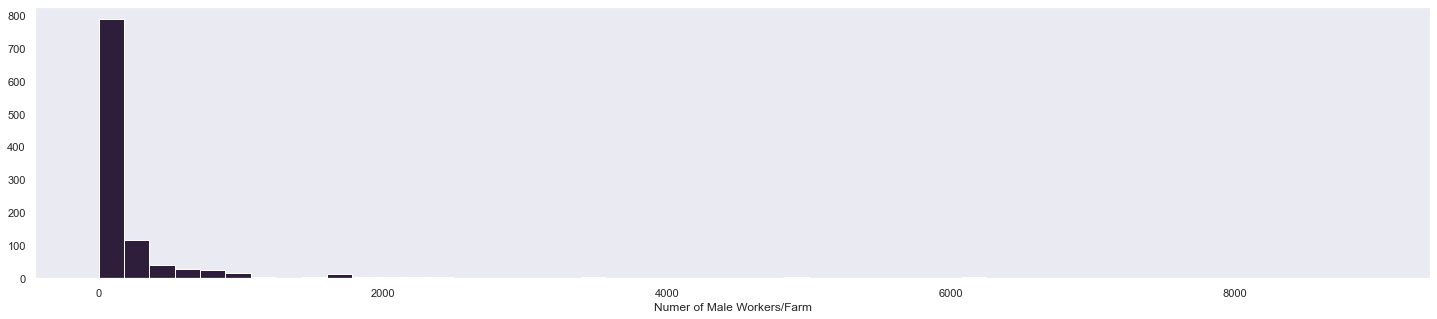

In [169]:
# Plot histograms of number of workers per farm
fig.tight_layout()
plt.hist(amazon_data["Total Workers"], bins=50)
plt.xlabel("Numer of Total Workers/Farm")
plt.show()

plt.hist(amazon_data["Female workers"], bins=50)
plt.xlabel("Numer of Female Workers/Farm")
plt.show()

plt.hist(amazon_data["Male Workers"], bins=50)
plt.xlabel("Numer of Male Workers/Farm")
plt.show()

In [95]:
amazon_data['Total Workers'].describe()

count     1078.000000
mean       479.783859
std       1389.523294
min          0.000000
25%         23.000000
50%         93.500000
75%        282.000000
max      14756.000000
Name: Total Workers, dtype: float64

### Category Analysis

In [96]:
categories = amazon_data["Category"].unique()
print(categories)

['Ornamental & medicinal plants' 'Fruit' 'Vegetable' 'Herbs & Spices'
 'Cattle' 'Cocoa' 'Coffee' 'Oilseeds and oleaginous'
 'Multi-ingredient consumer product' 'Tea']


[154, 605, 7, 12, 5, 27, 258, 5, 4, 1]


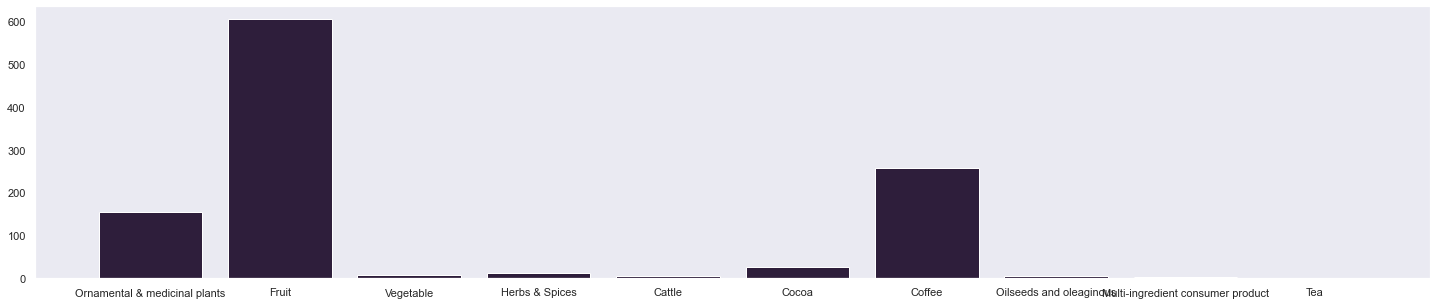

In [174]:
# Analyse number of farms per category

categories_data = NumberOfFarmsBarPlot("Category", categories)

[5510.42, 203905.45, 802.88, 907.46, 20607.08, 23026.609999999997, 236629.09999999998, 16231.61, 240.07999999999998, 540.0]


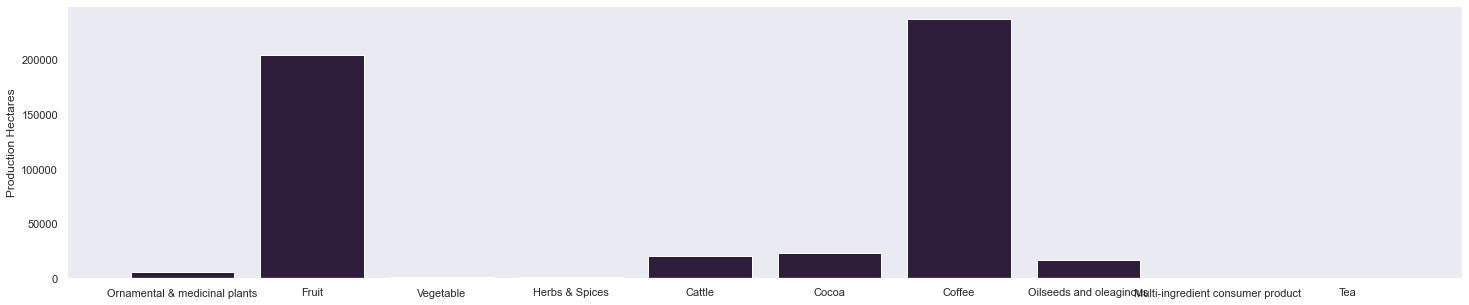

In [182]:
# Analyse number of production hectares per category

CountBarPlot(categories, categories_data, "Production Hectares")

[6310876064.400001, 7257353703.390001, 19869998.5, 24696581.2, 6376887.0, 26805364.47, 490095084.77, 144933363.46, 3414295.0, 3027066.0]


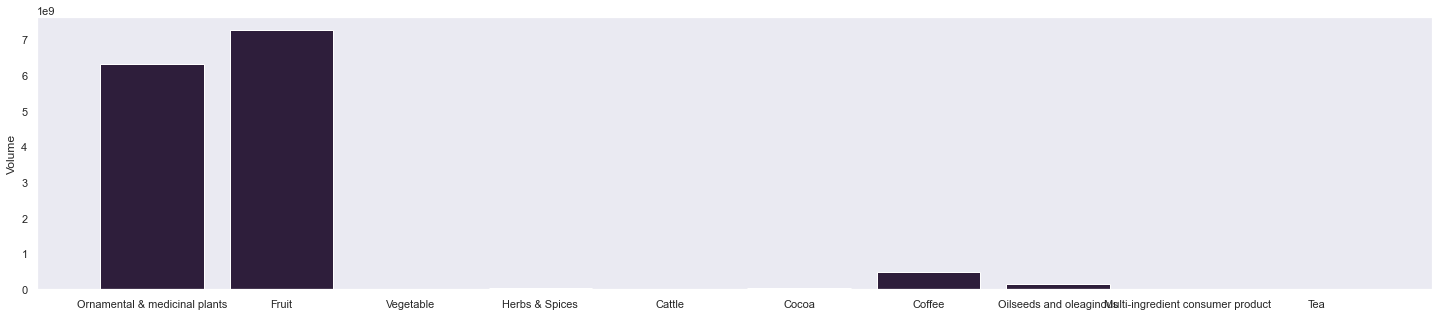

In [184]:
# Analyse volume of produce per category

CountBarPlot(categories, categories_data, "Volume")

Tot workers: [111387, 233657, 6405, 1182, 82, 6056, 156994, 1296, 80, 68]
Female workers: [60050, 77375, 2668, 445, 8, 639, 41677, 125, 22, 7]
Male workers: [51337, 156282, 3737, 737, 74, 5417, 115317, 1171, 58, 61]


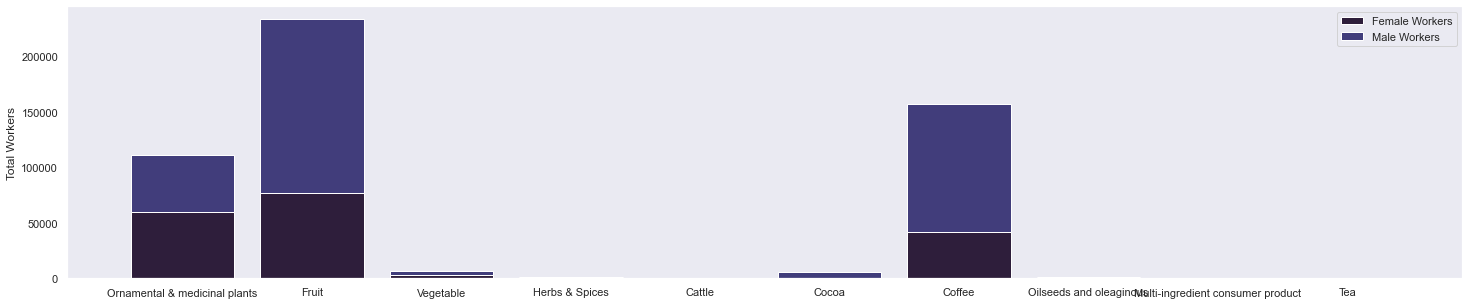

In [176]:
# Analyse number and gender of workers per category

GenderWorkersBarPlot(categories_data, categories)

### Country Analysis

In [31]:
countries = amazon_data["Country"].unique()
print(countries)

['Ecuador' 'Brazil' 'Peru' 'Colombia' 'Suriname']


[286, 188, 109, 494, 1]


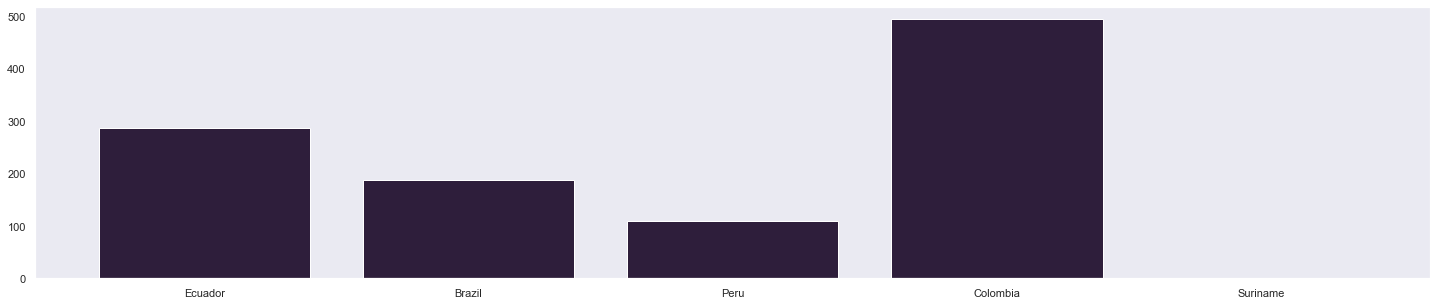

In [177]:
# Analyse number of farms per country

countries_data = NumberOfFarmsBarPlot("Country", countries)

[60993.350000000006, 224494.62, 58224.32, 163974.40000000002, 714.0]


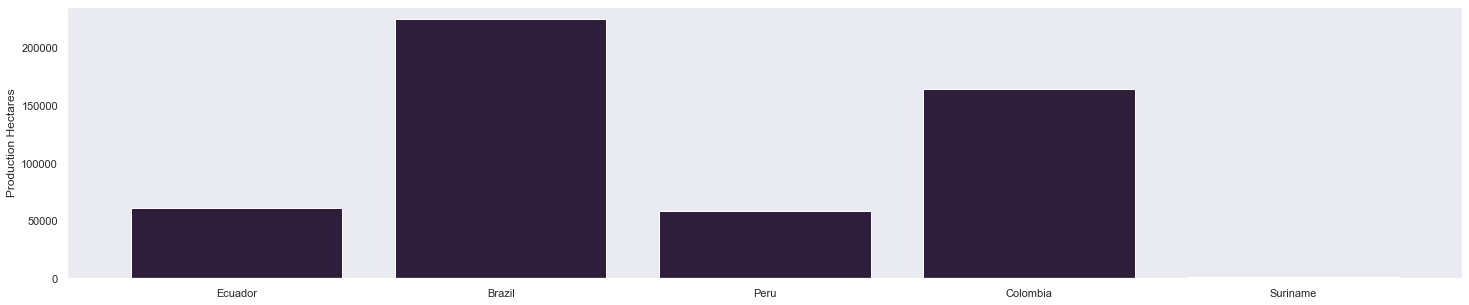

In [178]:
# Analyse number of production hectares per country

CountBarPlot(countries, countries_data, "Production Hectares")

[3077205946.2, 3173609673.13, 503689628.54, 7518943160.32, 14000000.0]


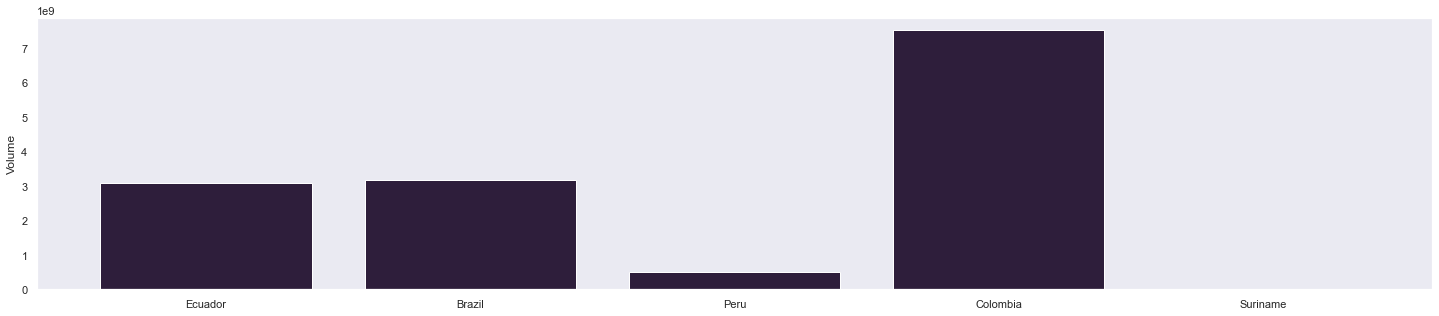

In [183]:
# Analyse volume of produce per country

CountBarPlot(countries, countries_data, "Volume")

Tot workers: [52035, 56256, 142158, 265600, 1158]
Female workers: [13910, 16332, 58199, 94145, 430]
Male workers: [38125, 39924, 83959, 171455, 728]


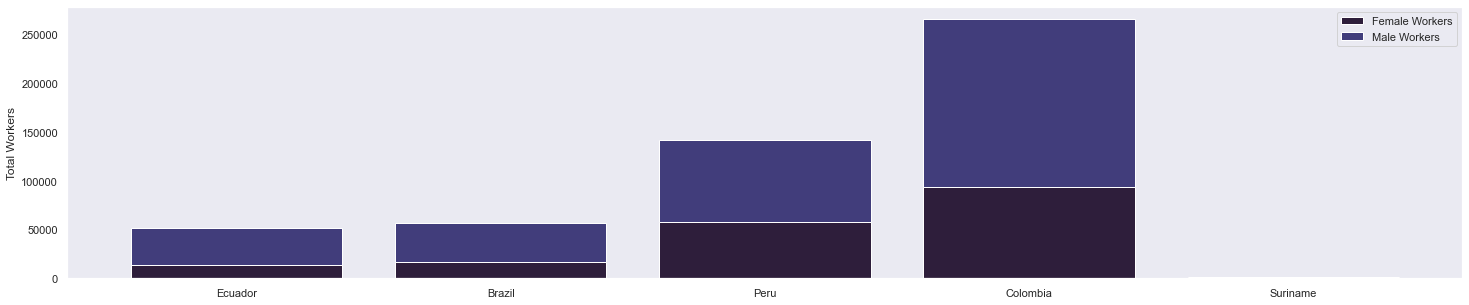

In [179]:
# Analyse number and gender of workers per country

GenderWorkersBarPlot(countries_data, countries)